<a href="https://colab.research.google.com/github/AugustoAnguita/Bioinformatics_UB/blob/main/SESION_2/sesion_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VISUALIZACIÓN DE RESULTADOS DE GWAS: MANHATTAN PLOT**  




# **Recordatorio: Introducción al NoteBook**
Dentro de este cuaderno (NoteBook), se te guiará paso a paso desde la carga de un conjunto de datos hasta la realización del análisis de su contenido.

El cuaderno *Jupyter* (Python) es un enfoque que combina bloques de texto (como este) junto con bloques o celdas de código. La gran ventaja de este tipo de celda es su interactividad, ya que pueden ejecutarse para comprobar los resultados directamente en ellas. *Muy importante:* **el orden de las instrucciones es fundamental**, por lo que cada celda de este cuaderno debe ejecutarse secuencialmente. Si se omite alguna, el programa puede dar un error, así que, en caso de duda, debes comenzar desde el principio.

Antes que nada:

Es **muy muy importante** que al inicio selecciones **"*Open in draft mode*" (draft mode)** (modo borrador), en la parte superior izquierda. De lo contrario, no te permitirá ejecutar ningún bloque de código, por motivos de seguridad. Cuando se ejecute el primero de los bloques aparecerá el siguiente mensaje: "*Warning: This notebook was not created by Google.*". No te preocupes, debes confiar en el contenido del cuaderno (NoteBook) y hacer clic en "Run anyway".

¡Vamos allá!

Haz clic en el botón "play" situado a la izquierda de cada celda de código. Las líneas de código que comienzan con una almohadilla (#) son comentarios y no afectan a la ejecución del programa.

También puedes hacer clic en cada celda y presionar "*ctrl+enter*" (*cmd+enter* on Mac).

Cada vez que ejecutes un bloque, verás la salida justo debajo. La información suele estar siempre relacionada con la última instrucción, junto con todos los comandos `print()` que aparezcan en el código.




## **INDICE**
1. [Instalación del Entorno R y Librerías](#install-libraries)    
2. [Carga y preparación de datos](#load-data)
3. [Visualización de resultados de PCA](#descriptive)   


## **1. Instalación del Entorno R y Librerías** <a name="install-libraries"></a>

A continuación, instalamos/cargamos las librerías necesarias para esta sesión. En el contexto del análisis del exposoma, las librerías de R nos ofrecen una forma mucho más conveniente de procesar, manipular y analizar los datos. Algunas de estas librerías: `tidyverse`, `skimr`, `readr`.

La instalación de R en nuestro entorno de Google Colab se llevará a cabo en el siguiente bloque de código. Debe recordarse que todas las instalaciones de librerías que realicemos en el entorno de Google Colab permanecerán activas solo durante unas horas, tras lo cual las librerías instaladas se eliminan. Por lo tanto, será necesario volver a ejecutar el código de instalación de librerías de esta sección siempre que se necesite volver a correr el cuaderno después de este tiempo.

Nota: Recomendamos instalar las librerías 5 minutos antes del inicio de la sesión❗❗❗


In [69]:
# first we check the R version we have
R.Version()

$platform
[1] "x86_64-pc-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "4"

$minor
[1] "5.1"

$year
[1] "2025"

$month
[1] "06"

$day
[1] "13"

$`svn rev`
[1] "88306"

$language
[1] "R"

$version.string
[1] "R version 4.5.1 (2025-06-13)"

$nickname
[1] "Great Square Root"

* **Install/load libraries for the session**

We will install/load the libraries necessary for the practical session, for this we will use the `pacman` package, this package is a management tool that combines the functionalities of the `install.packages` + `library` functions.


In [70]:
# Estimated execution time: 3 seconds approx.

install.packages('pacman') # allows us to install/upload packages simultaneously

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



We will install `BiocManager` and `rexposome` (these two packages are essential for exposome analysis) using the following code, as there are sometimes compatibility issues with the R version (the process takes around **20 minutes**, so it is recommended to install it during the theory session).

In [71]:
# Estimated execution time: 1 minute approx.

if (!requireNamespace("BiocManager", quietly=TRUE))
    install.packages("BiocManager")

packages = c("data.table","qqman","ggplot2", "readr","tidyverse","dplyr","ggrepel","patchwork"
)
for( pkg in packages ) {
  if( !pkg %in% rownames( installed.packages() ) ) {
    message( "Installing ", pkg )
    BiocManager::install( pkg )
  }
}

In [72]:
# Estimated execution time: XX minutes approx.
# Add all the libraries we need to use (if the package is already installed, it will automatically load the package if it is in the pacman::p_load() function).
pacman::p_load(ggplot2,data.table,qqman,readr,tidyverse,dplyr,ggrepel,patchwork)

## **2. Carga y preparación de datos** <a name="load-data"></a>

A continuación encontramos las **líneas de código** necesarias para **cargar** los datos genómicos y resultados del PCA llevado a cabo con PLINK durante la clase.

**1.-** Carga de datos (los datos han sido alojados en un servidor Github público para facilitar su carga).

In [95]:
# Leer directamente con read.table()
sumstats_ <- read_tsv(url("https://raw.githubusercontent.com/AugustoAnguita/Bioinformatics_UB/main/SESION_2/datasets/1kgeas.B1.glm.firth"), show_col_types = FALSE)

# Ver las primeras filas
head(sumstats_)


#CHROM,POS,ID,REF,ALT,PROVISIONAL_REF?,A1,OMITTED,A1_FREQ,TEST,OBS_CT,OR,LOG(OR)_SE,Z_STAT,P,ERRCODE
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,15774,1:15774:G:A,G,A,Y,A,G,0.0282258,ADD,496,0.749143,0.394005,-0.733051,0.463527,.
1,15777,1:15777:A:G,A,G,Y,G,A,0.0747475,ADD,495,0.834265,0.249216,-0.727094,0.467168,.
1,57292,1:57292:C:T,C,T,Y,T,C,0.1046750,ADD,492,1.093570,0.215320,0.415405,0.677846,.
1,77874,1:77874:G:A,G,A,Y,A,G,0.0201613,ADD,496,1.219180,0.451694,0.438737,0.660852,.
1,87360,1:87360:C:T,C,T,Y,T,C,0.0231388,ADD,497,1.672380,0.439486,1.170110,0.241955,.
1,125271,1:125271:C:T,C,T,Y,C,T,0.0302419,ADD,496,1.407140,0.364795,0.936297,0.349120,.


**2.-** Hacemos algunos arreglos en el dataset para poder visualizarlo

In [104]:
# Renombrar columnas
sumstats <- sumstats_
names(sumstats)[names(sumstats) == "#CHROM"] <- "CHR"
names(sumstats)[names(sumstats) == "POS"]    <- "BP"
names(sumstats)[names(sumstats) == "ID"]     <- "SNP"

# Limpiar y transformar
if (is.character(sumstats$P)) {
  sumstats$P <- gsub(",", ".", sumstats$P, fixed = TRUE)
}

sumstats <- sumstats %>%
  mutate(
    CHR  = as.integer(CHR),
    BP   = as.numeric(BP),
    P    = as.numeric(P),
    logP = -log10(P)
  ) %>%
  filter(!is.na(P), P > 0, P <= 1, CHR >= 1, CHR <= 22)

#Visualizar los top 25 SNPS (el dataset ordenado de mas a menos significativos por P-value)
sumstats_top <- sumstats[order(-sumstats$logP),]
sumstats_top[1:25,]

CHR,BP,SNP,REF,ALT,PROVISIONAL_REF?,A1,OMITTED,A1_FREQ,TEST,OBS_CT,OR,LOG(OR)_SE,Z_STAT,P,ERRCODE,logP
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2,55563020,2:55563020:A:G,A,G,Y,G,A,0.4838380,ADD,495,2.506180,0.141391,6.49801,8.13893e-11,.,10.089433
1,167582967,1:167582967:C:T,C,T,Y,C,T,0.4868690,ADD,495,0.456623,0.136138,-5.75809,8.50710e-09,.,8.070218
2,55658697,2:55658697:G:C,G,C,Y,G,C,0.4356140,ADD,497,0.462323,0.137141,-5.62553,1.84940e-08,.,7.732969
2,55344962,2:55344962:T:C,T,C,Y,T,C,0.4959840,ADD,498,0.541084,0.132884,-4.62193,3.80186e-06,.,5.420004
11,2050299,11:2050299:A:T,A,T,Y,T,A,0.2232320,ADD,495,2.051660,0.165001,4.35542,1.32813e-05,.,4.876759
13,66644381,13:66644381:T:A,T,A,Y,T,A,0.4535350,ADD,495,0.588998,0.130150,-4.06710,4.76019e-05,.,4.322376
17,42917182,17:42917182:C:T,C,T,Y,T,C,0.4737370,ADD,495,1.730100,0.135133,4.05659,4.97943e-05,.,4.302820
10,124230513,10:124230513:G:T,G,T,Y,T,G,0.1265180,ADD,494,0.450708,0.197212,-4.04101,5.32224e-05,.,4.273906
5,94549220,5:94549220:G:T,G,T,Y,T,G,0.2147180,ADD,496,0.506048,0.169781,-4.01178,6.02627e-05,.,4.219951


**3.-** Calculamos la posición de cada SNP y generamos el PVALOR corregido por error multi-test (usando el método de bonferroni)

In [105]:

# Calcular posición acumulada para Manhattan
chr_sizes <- sumstats %>%
  group_by(CHR) %>%
  summarise(chr_len = max(BP, na.rm = TRUE), .groups = "drop") %>%
  arrange(CHR) %>%
  mutate(tot = cumsum(chr_len) - chr_len)

sumstats <- sumstats %>%
  left_join(chr_sizes, by = "CHR") %>%
  arrange(CHR, BP) %>%
  mutate(BPcum = BP + tot)

# Ejes
axis_df <- sumstats %>%
  group_by(CHR) %>%
  summarise(center = (min(BPcum) + max(BPcum)) / 2, .groups = "drop")

options(repr.plot.width = 18, repr.plot.height = 5)  # ancho x alto en pulgadas

# --- (ya tienes sumstats preparado arriba) ---
# Ajuste multitest (Bonferroni)
sumstats <- sumstats %>% mutate(P_adj = p.adjust(P, method = "bonferroni"))
highlight_df <- sumstats %>% filter(P_adj < 0.05)

# N de SNPs que pasan el filtro de correción multitest
nrow(sumstats[sumstats$P_adj<0.05,])

[1] 3

## **3. Visualización** <a name="load-data"></a>

Una vez que tenemos correctamente formateado nuestro dataset con SNPs significativos, podemos proceder a su representación visual.


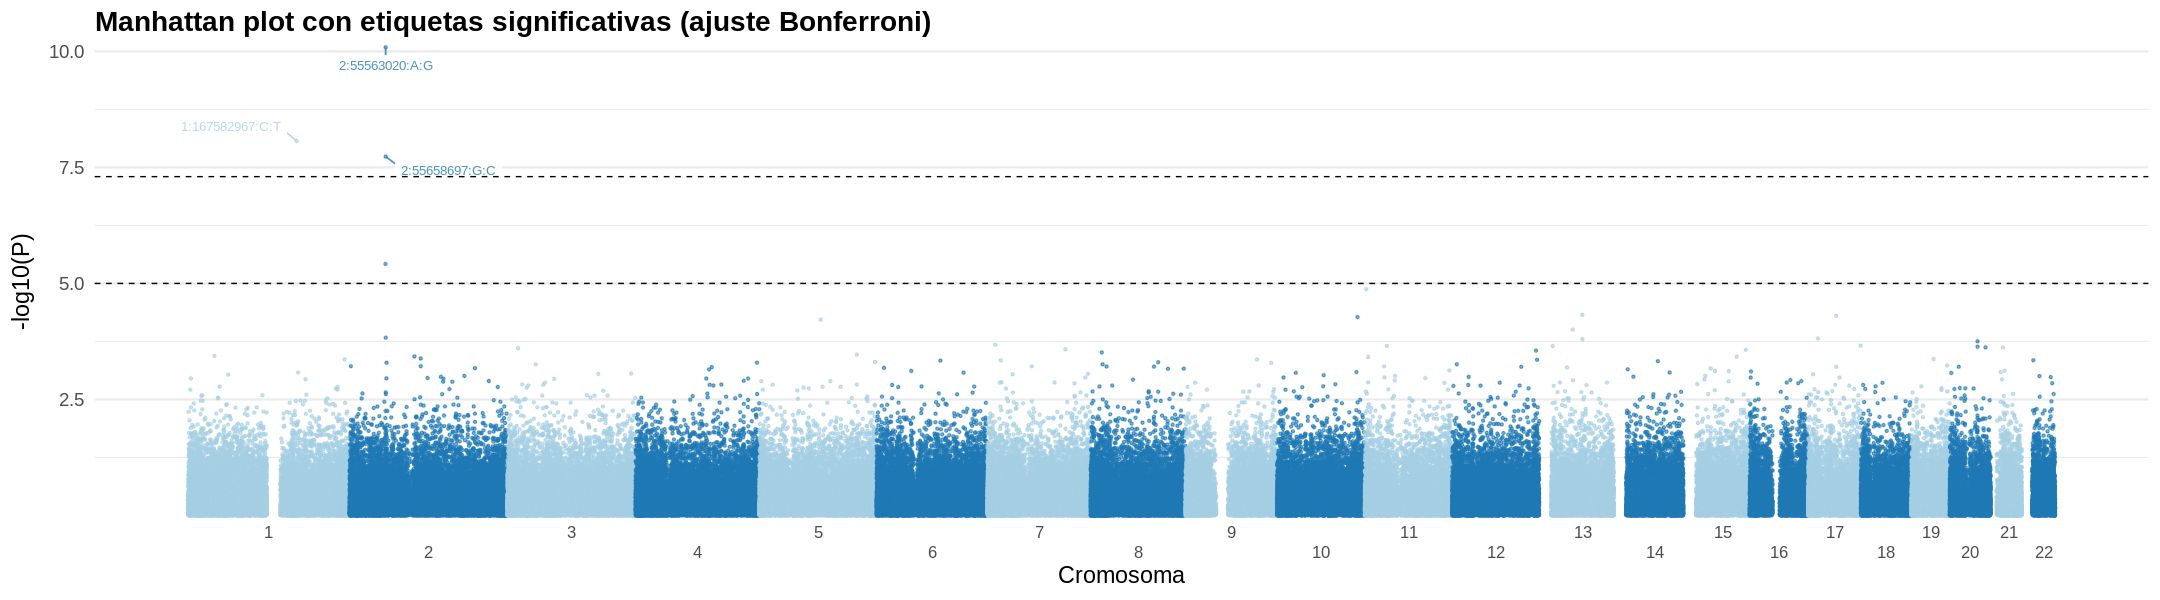

In [98]:
# --- PLOT MANHATTAN ANCHO Y LEGIBLE ---
library(ggplot2); library(ggrepel)

p <- ggplot(sumstats, aes(x = BPcum, y = logP, color = factor(CHR %% 2))) +
  geom_point(alpha = 0.6, size = 0.6) +
  # Etiquetas sólo para SNPs significativos (rsid)
  geom_label_repel(
    data = highlight_df,
    aes(label = SNP),
    size = 2.8,
    min.segment.length = 0,
    max.overlaps = 50,
    label.size = 0,
    fill = "white", alpha = 0.8,
    box.padding = 0.3, point.padding = 0.15
  ) +
  scale_color_manual(values = c("#1f78b4", "#a6cee3"), guide = "none") +
  scale_x_continuous(labels = axis_df$CHR, breaks = axis_df$center) +
  scale_y_continuous(expand = c(0, 0)) +
  geom_hline(yintercept = -log10(5e-8), linetype = "dashed", linewidth = 0.4) +
  geom_hline(yintercept = -log10(1e-5), linetype = "dashed", linewidth = 0.4) +
  labs(x = "Cromosoma", y = "-log10(P)",
       title = "Manhattan plot con etiquetas significativas (ajuste Bonferroni)") +
  theme_minimal(base_size = 14) +
  theme(
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    plot.title = element_text(face = "bold"),
    axis.text.x = element_text(size = 10)
  ) +
  guides(x = guide_axis(n.dodge = 2)) +    # evita solapamiento de las etiquetas del eje
  coord_cartesian(clip = "off")            # que no corte las etiquetas

p


Y ahora lanzamos el qqplot

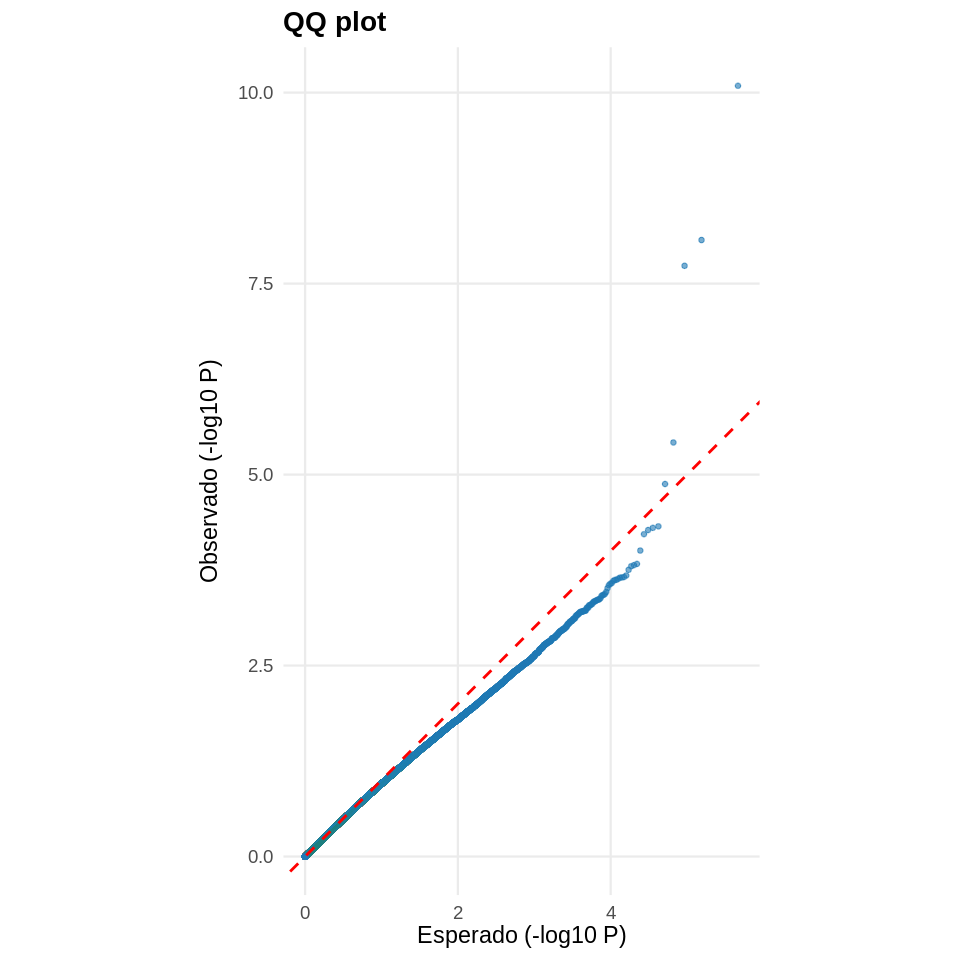

In [99]:
# --- QQ PLOT ANCHO EN COLAB ---
options(repr.plot.width = 8, repr.plot.height = 8)  # cuadrado para QQ plot

# Datos ordenados por P
qq_df <- sumstats %>%
  arrange(P) %>%
  mutate(
    observed = -log10(P),
    expected = -log10(ppoints(n()))
  )

# --- Plot ---
p_qq <- ggplot(qq_df, aes(x = expected, y = observed)) +
  geom_point(size = 1.2, alpha = 0.6, color = "#1f78b4") +
  geom_abline(intercept = 0, slope = 1, color = "red", linewidth = 0.8, linetype = "dashed") +
  labs(
    x = "Esperado (-log10 P)",
    y = "Observado (-log10 P)",
    title = "QQ plot"
  ) +
  theme_minimal(base_size = 14) +
  coord_equal() +
  theme(
    plot.title = element_text(face = "bold"),
    panel.grid.minor = element_blank()
  )

p_qq
